<a href="https://colab.research.google.com/github/tntiyas/tn-tiyas/blob/master/1800018195.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERBANDINGAN JUMLAH CUSTOMER YANG MEMILIH MEMAKAI KEAMANAN ONLINE ATAU TIDAK**

NAMA  : TRINOVIANTI NINGTIYAS (1800018195)


KELAS : E


**Persiapan Environtment**

**Instalasi java jdk dan pyspark**

**Instalasi package findspark dan pyspark_dist_explore.**


In [38]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark

Import package OS dan set environtment Java

In [39]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

import package yang akan digunakan

In [40]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg

In [41]:
!pip install -q pyspark_dist_explore

In [42]:
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

Inisialisasi SparkContext dan SparkSession

In [43]:
sc = spark.sparkContext
spark = SparkSession(sc)

**LOAD DATASET**

In [44]:
Customer_Chun_df = spark.read.csv("Customer_Chun.csv", header=True, inferSchema=True)
Customer_Chun_df.printSchema()            #mengecek schema dari dataset

root
 |-- customerIDgender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: integer (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: string (nullable = true)
 |-- PhoneService: integer (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: string (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



**1. PROSES EDA**

In [45]:
print("Total Jumlah Customer : ", Customer_Chun_df.count())

Total Jumlah Customer :  7043


In [46]:
Customer_Chun_df.show(5)

+----------------+-------------+-------+----------+------+------------+-------------+----------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------------+------------+-------+
|customerIDgender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines| InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|      MonthlyCharges|TotalCharges|  Churn|
+----------------+-------------+-------+----------+------+------------+-------------+----------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------------+------------+-------+
|      7590-VHVEG|       Female|      0|       Yes|    No|           1|           No|No phone service|           DSL|          No|             Yes|         No|         No|             No|   

**statistik dataset pada pengguna internet**

In [47]:
Customer_Chun_df.describe().show()

+-------+----------------+-------------+------------------+----------+------+------------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------------+------------------+------------------+
|summary|customerIDgender|SeniorCitizen|           Partner|Dependents|tenure|      PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|      MonthlyCharges|      TotalCharges|             Churn|
+-------+----------------+-------------+------------------+----------+------+------------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------------+------------------+------------------+
|  count|            7043|         7043|              7043|      70

PERSEBARAN DATA TOTALCHARGES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

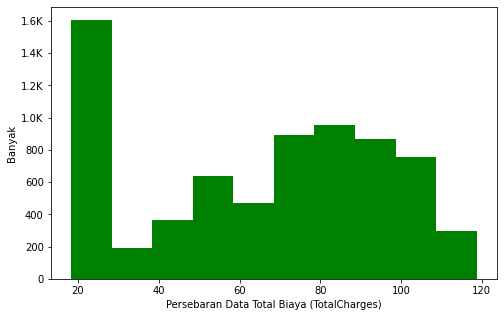

In [25]:
Customer_Chun_df_TotalCharges = Customer_Chun_df.select('TotalCharges')

fig, axes = plt.subplots()
fig.set_size_inches(8, 5)
hist(axes, Customer_Chun_df_TotalCharges, color="green")
plt.xlabel('Persebaran Data Total Biaya (TotalCharges)')
plt.ylabel('Banyak')

plt.show()

cek data apakah ada yang null atau tidak

In [19]:
table = ['customerIDgender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

for kolom in table:
  print('jumlah data yang bernilai null pada colom ', kolom, ' : ', Customer_Chun_df.where(col(kolom).isNull()).count())

jumlah data yang bernilai null pada colom  customerIDgender  :  0
jumlah data yang bernilai null pada colom  SeniorCitizen  :  0
jumlah data yang bernilai null pada colom  Partner  :  0
jumlah data yang bernilai null pada colom  Dependents  :  0
jumlah data yang bernilai null pada colom  tenure  :  0
jumlah data yang bernilai null pada colom  PhoneService  :  0
jumlah data yang bernilai null pada colom  MultipleLines  :  0
jumlah data yang bernilai null pada colom  InternetService  :  0
jumlah data yang bernilai null pada colom  OnlineSecurity  :  0
jumlah data yang bernilai null pada colom  OnlineBackup  :  0
jumlah data yang bernilai null pada colom  DeviceProtection  :  0
jumlah data yang bernilai null pada colom  TechSupport  :  0
jumlah data yang bernilai null pada colom  StreamingTV  :  0
jumlah data yang bernilai null pada colom  StreamingMovies  :  0
jumlah data yang bernilai null pada colom  Contract  :  0
jumlah data yang bernilai null pada colom  PaperlessBilling  :  0
jumla

**2. PRE PROCESSING**

In [23]:
# seleksi data
Customer_Chun_df = Customer_Chun_df.select('CustomerIDgender', 'OnlineSecurity', 'TotalCharges')

# tampilkan 10 data teratas
Customer_Chun_df.show(10)

+----------------+--------------+------------+
|CustomerIDgender|OnlineSecurity|TotalCharges|
+----------------+--------------+------------+
|      7590-VHVEG|           DSL|       29.85|
|      5575-GNVDE|           DSL|       56.95|
|      3668-QPYBK|           DSL|       53.85|
|      7795-CFOCW|           DSL|        42.3|
|      9237-HQITU|   Fiber optic|        70.7|
|      9305-CDSKC|   Fiber optic|       99.65|
|      1452-KIOVK|   Fiber optic|        89.1|
|      6713-OKOMC|           DSL|       29.75|
|      7892-POOKP|   Fiber optic|       104.8|
|      6388-TABGU|           DSL|       56.15|
+----------------+--------------+------------+
only showing top 10 rows



**3. PEMROSESAN DATA**

In [28]:
print('Perbandingan biaya keamanan online berdasarkan jenis kelamin')
perbandingan_KeamananOnline_jk.show()

# ambil data single value dari spark sql
rata_biaya_pr = perbandingan_KeamananOnline_jk.collect()[0][1]
rata_biaya_lk = perbandingan_KeamananOnline_jk.collect()[1][1]

Perbandingan biaya keamanan online berdasarkan jenis kelamin
+----------------+-----------------+
|CustomerIDgender|avg(TotalCharges)|
+----------------+-----------------+
|      3668-QPYBK|            53.85|
|      6234-RAAPL|             99.9|
|      1894-IGFSG|            89.25|
|      6982-SSHFK|             44.4|
|      5859-HZYLF|            19.15|
|      6479-OAUSD|             19.9|
|      2592-YKDIF|            20.35|
|      6718-BDGHG|            64.85|
|      3195-TQDZX|            20.25|
|      4248-QPAVC|            85.35|
|      5668-MEISB|            106.1|
|      5802-ADBRC|            104.4|
|      2712-SYWAY|             25.7|
|      2011-TRQYE|             33.5|
|      7244-KXYZN|            20.45|
|      0953-LGOVU|             35.5|
|      3623-FQBOX|            19.95|
|      3692-JHONH|            106.5|
|      3528-HFRIQ|             52.3|
|      7661-CPURM|             87.7|
+----------------+-----------------+
only showing top 20 rows



In [27]:
print('Rata rata perbandingan biaya keamanan online')
rata_rata_biaya.show()


Rata rata perbandingan biaya keamanan online
+--------------+------------------+
|OnlineSecurity| avg(TotalCharges)|
+--------------+------------------+
|   Fiber optic| 91.50012919896615|
|            No|21.079193971166454|
|           DSL| 58.10216852540261|
+--------------+------------------+



In [29]:
# pada pemrosesan data ini menggunakan transformasi dan action pada spark dataframe

# hitung rata-rata biaya keamanan online
rata_biaya_berdasarkan_jk = Customer_Chun_df.groupby('OnlineSecurity').avg('TotalCharges')

# output

print('\n Rata-rata biaya keamanan online')

rata_biaya_berdasarkan_jk.show()


 Rata-rata biaya keamanan online
+--------------+------------------+
|OnlineSecurity| avg(TotalCharges)|
+--------------+------------------+
|   Fiber optic| 91.50012919896615|
|            No|21.079193971166454|
|           DSL| 58.10216852540261|
+--------------+------------------+



**4. VISUALISASI DATA**

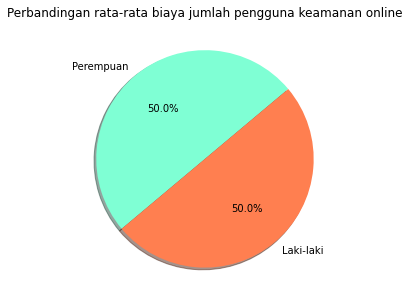

In [37]:
# plotting data
fig, axes = plt.subplots()

# jumlah pengguna keamanan online berdasarkan biaya
fig.set_size_inches(7, 5)

plt.title('Perbandingan rata-rata biaya jumlah pengguna keamanan online')
plt.pie([Customer_Chun_df.count(), Customer_Chun_df.count()], labels=['Perempuan', 'Laki-laki'], autopct='%1.1f%%', 
        shadow=True, startangle=40, colors=['#7FFFD4', 'coral'])
print('\n')